In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

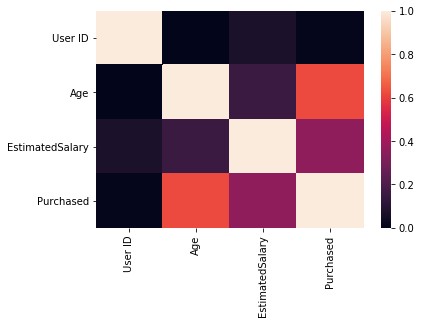

In [8]:
sns.heatmap(dataset.corr())

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Malleswara.raoyenug\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Malleswara.raoyenug\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Malleswara.raoyenug\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


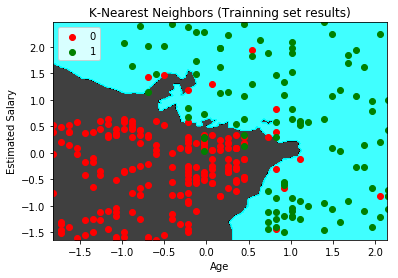

In [18]:
X_set_train, y_set_train = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set_train[:, 0].min(),
                               stop=X_set_train[:, 0].max(), step=0.01),
                     np.arange(start=X_set_train[:, 1].min(),
                               stop=X_set_train[:, 1].max(), step=0.01))

# Building the graph contour based on classification method
Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('black', 'cyan')))

# Apply limits when outliers are present
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Creating the scatter plot of the Training set results
for i, j in enumerate(np.unique(y_set_train)):
    plt.scatter(X_set_train[y_set_train == j, 0], X_set_train[y_set_train == j,
                                                              1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-Nearest Neighbors (Trainning set results)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


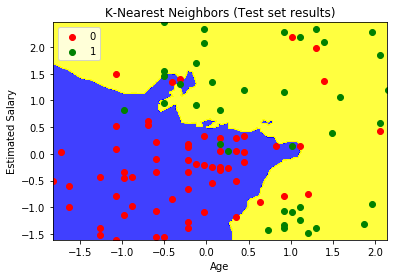

In [19]:
X_set_test, y_set_test = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set_test[:, 0].min(),
                               stop=X_set_test[:, 0].max(), step=0.01),
                     np.arange(start=X_set_test[:, 1].min(),
                               stop=X_set_test[:, 1].max(), step=0.01))

# Building the graph contour based on classification method
Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('blue', 'yellow')))

# Apply limits when outliers are present
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Creating the scatter plot of the Training set results
for i, j in enumerate(np.unique(y_set_test)):
    plt.scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test == j,
                                                              1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-Nearest Neighbors (Test set results)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[52, 10],
       [ 5, 33]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        62
           1       0.77      0.87      0.81        38

   micro avg       0.85      0.85      0.85       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.86      0.85      0.85       100



In [26]:
print(accuracy_score(y_test, y_pred))

0.85
